In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [6]:
df = pd.read_csv("G:\Data-Science-Portfolio\Movie Dataset\movie_metadata.csv")

In [7]:
df.head(3)
df.shape

(5043, 28)

In [8]:
np.sum(df.isnull())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
df=df.fillna(0)
df.head()[:2]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


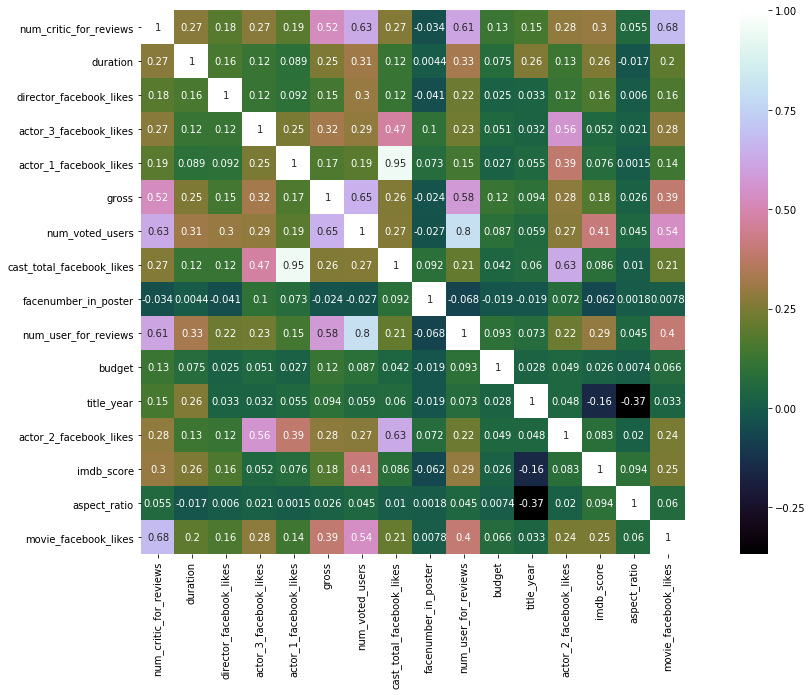

In [6]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [7]:
def create_comparison_database(name, value, x, no_films):
    
    comparison_df = df.groupby(name, as_index=False)
    
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum() 
    
    # Create database with either name of directors or actors, the value being compared i.e. 'gross',
    # and number of films they're listed with. Then sort by value being compared.
    name_count_key = df[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   
    # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).iloc[:,0]
    
    return comp_series

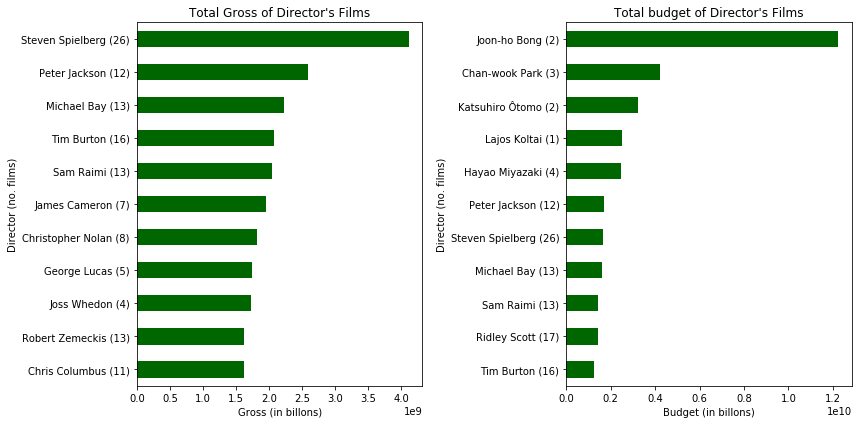

In [8]:
fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','gross','sum', 0).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total Gross of Director's Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','budget','sum', 0).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total budget of Director's Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Budget (in billons)")

plt.tight_layout()


In [9]:
data=DataFrame(df)
X_data=data.dtypes[data.dtypes!='object'].index
X_train=data[X_data]
X_train.head()[:2]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0


In [10]:
X_train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,138.804283,106.882213,672.351576,642.068015,6550.941305,3.997226e+07,8.366816e+04,9699.063851,1.367638,271.634940,3.587432e+07,1959.585961,1647.496530,6.442138,2.075546,7525.964505
std,121.792053,25.828463,2785.871819,1661.808199,15012.315824,6.483779e+07,1.384853e+05,18163.799124,2.012180,377.603767,1.961555e+08,290.180846,4038.092967,1.125116,1.447089,19320.445110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.600000,0.000000,0.000000
25%,48.000000,93.000000,6.000000,130.000000,611.000000,3.037815e+05,8.593500e+03,1411.000000,0.000000,64.000000,3.000000e+06,1998.000000,278.500000,5.800000,1.850000,0.000000
50%,109.000000,103.000000,45.000000,367.000000,986.000000,1.527968e+07,3.435900e+04,3090.000000,1.000000,155.000000,1.500000e+07,2005.000000,595.000000,6.600000,1.850000,166.000000
75%,194.000000,118.000000,189.000000,635.000000,11000.000000,5.135707e+07,9.630900e+04,13756.500000,2.000000,324.000000,4.000000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [11]:
columns=X_train.columns.tolist()
y=X_train['imdb_score']
X_train.drop(['imdb_score'],axis=1,inplace=True)
X_train.head()[:2]

C:\Users\arjun\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,2.35,0


In [12]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

C:\Users\arjun\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
X_Train=X_train.values
X_Train=np.asarray(X_Train)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_Train)

PCA

Text(0,0.5,u'Cumulative explained variance')

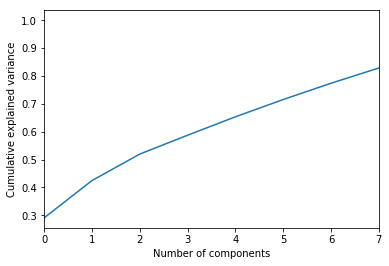

In [14]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

(-2, 2)

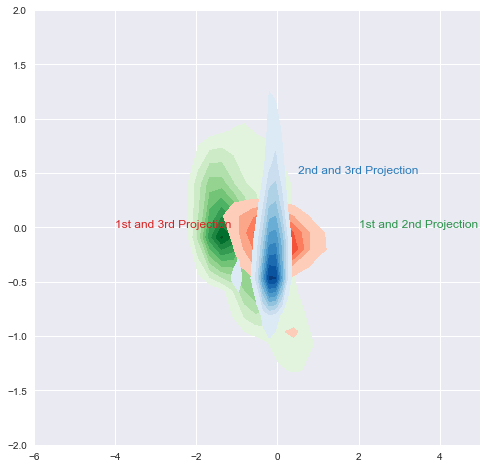

In [15]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=5)
X_Train=sklearn_pca.fit_transform(X_std)

sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)


In [16]:
number_of_samples = len(y)
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
x_train = X_Train[random_indices[:num_training_samples]]
y_train=y[random_indices[:num_training_samples]]
x_test=X_Train[random_indices[num_training_samples:]]
y_test=y[random_indices[num_training_samples:]]
y_Train=list(y_train)

Ridge Regression

In [17]:
model=linear_model.Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

error=0
for i in range(len(y_Train)):
    error+=(abs(y_Train[i]-y_predict[i])/y_Train[i])
train_error_ridge=error/len(y_Train)*100
print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Y_test=model.predict(x_test)
y_Predict=list(y_test)

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Train error = 13.914226734 percent in Ridge Regression
Test error = 15.2997166055 percent in Ridge Regression


Text(0.5,1,u'Residual plot in Ridge Regression')

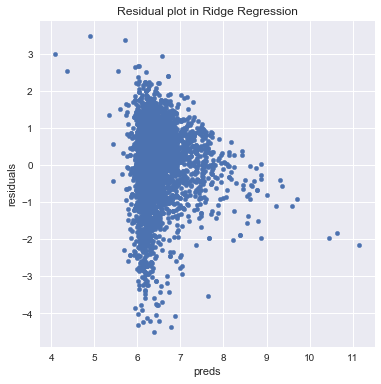

In [18]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

KNN Algorithm

In [19]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
y1_knn=knn.predict(x_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_Train[i])/y_Train[i])
train_error_knn=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(x_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-Y_test[i])/Y_test[i])
test_error_knn=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Train error = 10.8129372127 percent in Knn algorithm
Test error = 6.87822167333 percent in knn algorithm


Text(0.5,1,u'Residual plot in KNN')

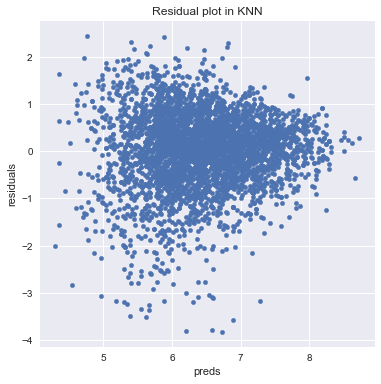

In [20]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in KNN")

Bayesian Regression 

In [21]:
reg = linear_model.BayesianRidge()
reg.fit(x_train,y_train)
y1_reg=reg.predict(x_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(x_test)
y2_reg=list(y2_reg)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_reg[i]-y_Train[i])/y_Train[i])
train_error_bay=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_bay)+" percent"+" in Bayesian Regression")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_reg[i]-Y_test[i])/Y_test[i])
test_error_bay=(error/len(Y_test))*100
print("Test error = "+'{}'.format(test_error_bay)+" percent"+" in Bayesian Regression")

Train error = 13.9174966137 percent in Bayesian Regression
Test error = 0.0252874355374 percent in Bayesian Regression


Text(0.5,1,u'Residual plot in Bayesian Regression')

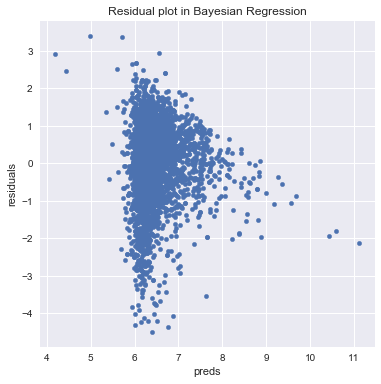

In [22]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":reg.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Bayesian Regression")

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor(max_depth=1)
dec.fit(x_train,y_train)
y1_dec=dec.predict(x_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(x_test)
y2_dec=list(y2_dec)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_Train[i])/y_Train[i])
train_error_tree=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-Y_test[i])/Y_test[i])
test_error_tree=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Train error = 14.5909418915 percent in Decision Tree Regressor
Test error = 5.81665008735 percent in Decision Tree Regressor


Text(0.5,1,u'Residual plot in Decision Tree')

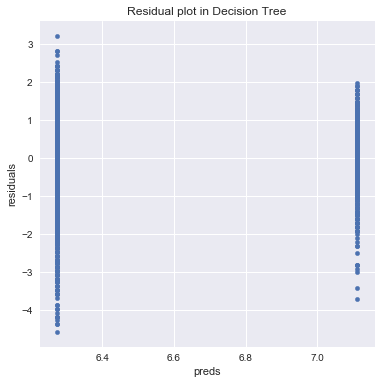

In [24]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":dec.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Decision Tree")

SVM

In [25]:
svm_reg=svm.SVR()
svm_reg.fit(x_train,y_train)
y1_svm=svm_reg.predict(x_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(x_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_Train[i])/y_Train[i])
train_error_svm=error/len(y_Train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-Y_test[i])/Y_test[i])
test_error_svm=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Train error = 12.036337748 percent in SVM Regressor
Test error = 5.40385205748 percent in SVM Regressor


Text(0.5,1,u'Residual plot in SVM')

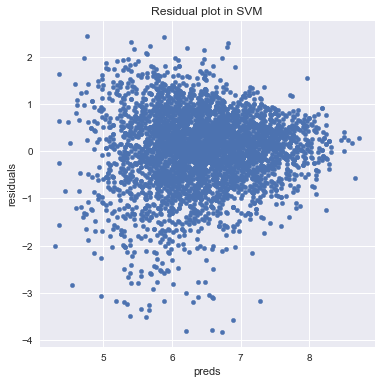

In [26]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in SVM")

In [27]:
train_error=[train_error_ridge,train_error_knn,train_error_bay,train_error_tree,train_error_svm]
test_error=[test_error_ridge,test_error_knn,test_error_bay,test_error_tree,test_error_svm]

col={'Train Error':train_error,'Test Error':test_error}
models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM']
df=DataFrame(data=col,index=models)
df

,Test Error,Train Error
Ridge Regression,15.299717,13.914227
Knn,6.878222,10.812937
Bayesian Regression,0.025287,13.917497
Decision Tree,5.816650,14.590942
SVM,5.403852,12.036338


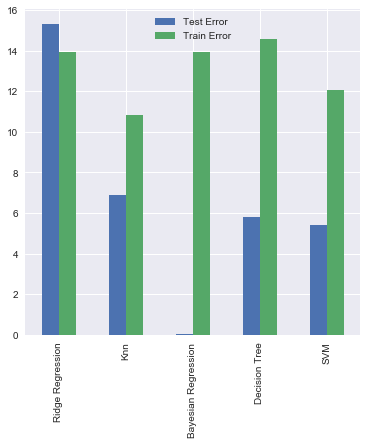

In [28]:
df.plot(kind='bar')

Seems that KNN turned out to be the winner.Its because of the fact that there are very large number of data points and and also features are highly continuous Moreover the dimentionality of the processed data is not too high

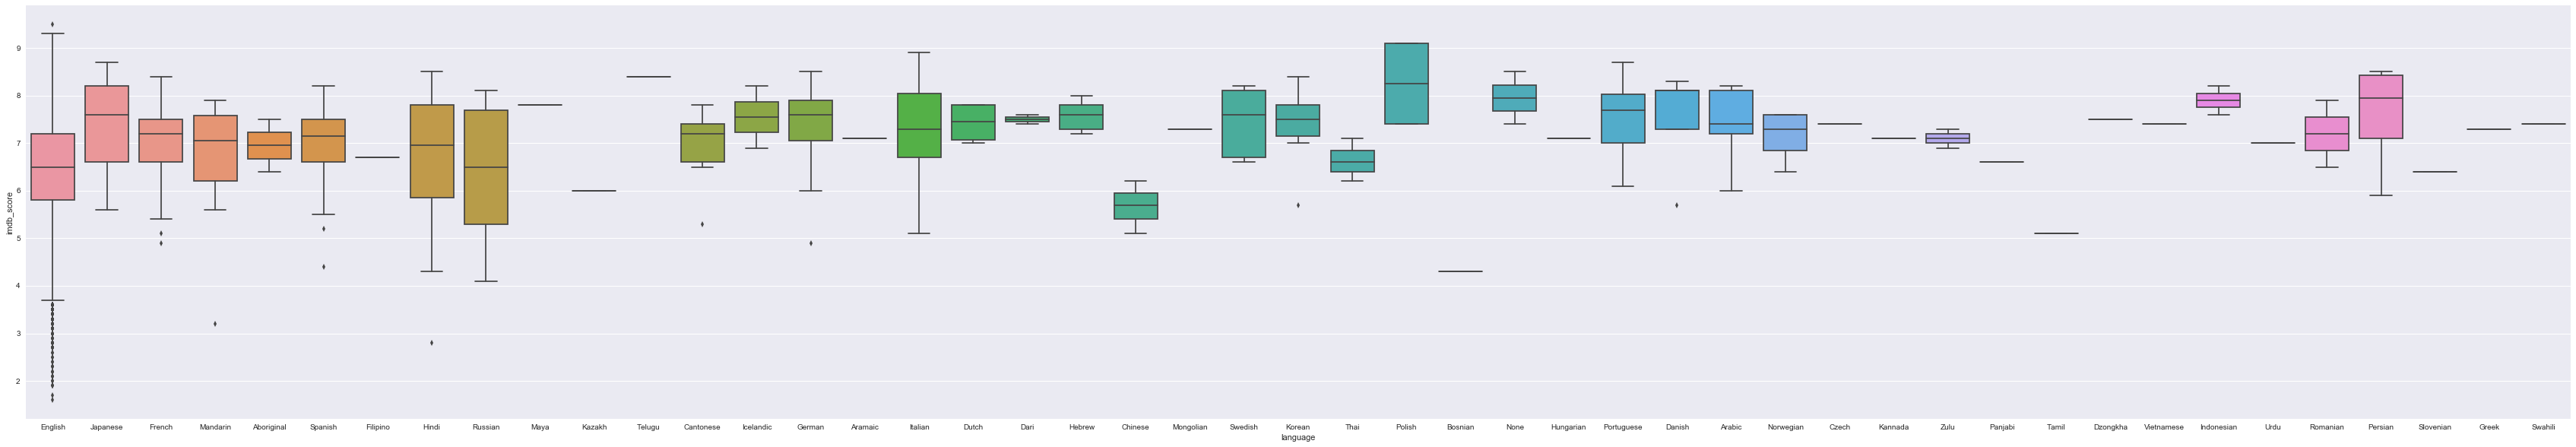

In [36]:
plt.figure(figsize=(60,10))
sns.boxplot(x='language', y='imdb_score', data=df)

In [40]:
df['profits']=df['gross']-df['budget']

In [42]:
#10 directors with highest sum gross
director_list_gross = df[['director_name', 'profits']]
director_score_gross= director_list_gross['profits'].groupby(director_list_gross['director_name']).sum()
director_score_gross= director_score_gross.to_frame(name= 'profits')
(director_score_gross.sort_values('profits', ascending = False)).head(10)


,profits
director_name,
Steven Spielberg,2.486332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08
Peter Jackson,9.009693e+08
Tim Burton,8.242755e+08
Christopher Nolan,8.082276e+08
Jon Favreau,7.693815e+08


In [44]:
#10 directors with highest sum gross
director_list_gross = df[['movie_title', 'profits']]
director_score_gross= director_list_gross['profits'].groupby(director_list_gross['movie_title']).sum()
director_score_gross= director_score_gross.to_frame(name= 'profits')
(director_score_gross.sort_values('profits', ascending = False)).head(10)


,profits
movie_title,
The Avengers,806559094.0
Avatar,523505847.0
Jurassic World,502177271.0
Titanic,458672302.0
Star Wars: Episode IV - A New Hope,449935665.0
E.T. the Extra-Terrestrial,424449459.0
The Lion King,377783777.0
The Jungle Book,375290282.0
Star Wars: Episode I - The Phantom Menace,359544677.0
